<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here
# Identify duplicate rows
num_duplicates = df.duplicated().sum() 
print("Number of duplicate rows:", num_duplicates)

#Task 2 Remove duplicate rows 
df_cleaned = df.drop_duplicates()
#to check the Number of duplicate rows after removal 
num_duplicates_after = df_cleaned.duplicated().sum()
print("Number of duplicate rows after removal:", num_duplicates_after)

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
# Missing values for all columns (count and %)
na_count = df.isna().sum().sort_values(ascending=False)
na_pct   = (df.isna().mean() * 100).round(2)
missing_summary = pd.concat([na_count, na_pct], axis=1)
missing_summary.columns = ["missing_count", "missing_%"]
print(missing_summary)

                            missing_count  missing_%
AINextMuch less integrated          64289      98.25
AINextLess integrated               63082      96.40
AINextNo change                     52939      80.90
AINextMuch more integrated          51999      79.46
EmbeddedAdmired                     48704      74.43
...                                   ...        ...
MainBranch                              0       0.00
Check                                   0       0.00
Employment                              0       0.00
Age                                     0       0.00
ResponseId                              0       0.00

[114 rows x 2 columns]


In [8]:
## Write your code here
#Missing values in 'CodingActivities'
missing_remote = df['CodingActivities'].isna().sum()
print("Number of missing rows in 'CodingActivities':", missing_remote)

Number of missing rows in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here

# Task 3: Impute missing values in 'CodingActivities' with forward-fill

# Before imputation: count missing
print("Missing values in 'CodingActivities' before:", df['CodingActivities'].isna().sum())

# Forward-fill (ffill)
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

# After imputation: verify
print("Missing values in 'CodingActivities' after:", df['CodingActivities'].isna().sum())

Missing values in 'CodingActivities' before: 10971
Missing values in 'CodingActivities' after: 0


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_28960\4279849541.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
## Write your code here

# --- Section 3, Task 4: Identify compensation-related columns ---

# Step 1: Look for any columns that mention "Comp"
comp_columns = [col for col in df.columns if "Comp" in col]

# Step 2: Print the result
print("Compensation-related columns found:", comp_columns)

# Step 3: Preview the first few rows of ConvertedCompYearly if it exists
if "ConvertedCompYearly" in comp_columns:
    print("\nFirst few rows of ConvertedCompYearly:")
    print(df["ConvertedCompYearly"].head())
else:
    print("\nNo ConvertedCompYearly column found in dataset.")

Compensation-related columns found: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']

First few rows of ConvertedCompYearly:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedCompYearly, dtype: float64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [11]:
## Write your code here
# --- Section 3, Task 5: Normalize ConvertedCompYearly using Min-Max Scaling ---

# Step 1: Check if column exists
if "ConvertedCompYearly" in df.columns:
    # Convert to numeric (in case of non-numeric entries)
    comp = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
    
    # Step 2: Apply Min-Max normalization
    comp_min = comp.min()
    comp_max = comp.max()
    df["ConvertedCompYearly_MinMax"] = (comp - comp_min) / (comp_max - comp_min)
    
    # Step 3: Verify
    print("Min:", comp_min, "| Max:", comp_max)
    print(df[["ConvertedCompYearly", "ConvertedCompYearly_MinMax"]].head())
else:
    print("ConvertedCompYearly column not found.")


Min: 1.0 | Max: 16256603.0
   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [12]:
## Write your code here

# --- Section 3, Task 6: Normalize ConvertedCompYearly using Z-score ---

# Step 1: Check if column exists
if "ConvertedCompYearly" in df.columns:
    # Convert to numeric (handle errors/missing values)
    comp = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
    
    # Step 2: Calculate mean and standard deviation
    comp_mean = comp.mean()
    comp_std  = comp.std()
    
    # Step 3: Apply Z-score normalization
    df["ConvertedCompYearly_Zscore"] = (comp - comp_mean) / comp_std
    
    # Step 4: Verify
    print("Mean:", comp_mean, "| Std Dev:", comp_std)
    print(df[["ConvertedCompYearly", "ConvertedCompYearly_Zscore"]].head())
else:
    print("ConvertedCompYearly column not found.")

Mean: 86155.28726264134 | Std Dev: 186756.97308629757
   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


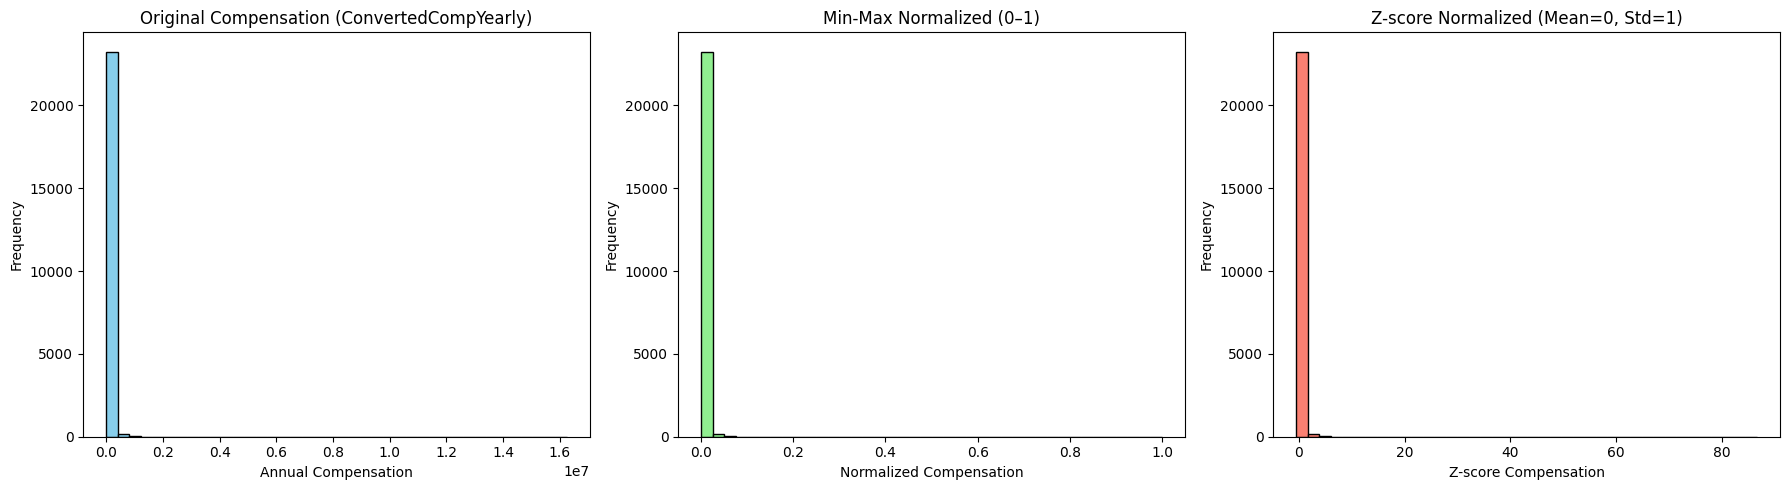

In [13]:
## Write your code here
# %%
# --- Section 4, Task 7: Visualize distributions ---

if "ConvertedCompYearly" in df.columns and \
   "ConvertedCompYearly_MinMax" in df.columns and \
   "ConvertedCompYearly_Zscore" in df.columns:
    
    plt.figure(figsize=(18, 5))

    # Original data
    plt.subplot(1, 3, 1)
    df["ConvertedCompYearly"].dropna().plot(kind="hist", bins=40, color="skyblue", edgecolor="black")
    plt.title("Original Compensation (ConvertedCompYearly)")
    plt.xlabel("Annual Compensation")

    # Min-Max normalized
    plt.subplot(1, 3, 2)
    df["ConvertedCompYearly_MinMax"].dropna().plot(kind="hist", bins=40, color="lightgreen", edgecolor="black")
    plt.title("Min-Max Normalized (0–1)")
    plt.xlabel("Normalized Compensation")

    # Z-score normalized
    plt.subplot(1, 3, 3)
    df["ConvertedCompYearly_Zscore"].dropna().plot(kind="hist", bins=40, color="salmon", edgecolor="black")
    plt.title("Z-score Normalized (Mean=0, Std=1)")
    plt.xlabel("Z-score Compensation")

    plt.tight_layout()
    plt.show()
else:
    print("One or more required columns not found in dataset.")

✅ What this does:

Creates three histograms side by side.
First plot: raw salary values (very skewed, long right tail).
Second plot: Min-Max normalized values compressed between 0 and 1.
Third plot: Z-score normalized values centered around 0, with spread based on standard deviation.

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
